In [1]:
#  Jordan Hoover
#  CSC570R Fall 2016
#  Assignment: 
#  Applying Logistic Regression to the Titanic DataSet

# Using Logistic Regression to Predict Survival on the Titanic
Goal of the assingment is to increase the AUC to 0.80 or higher.  
Summary of intermediate and final results at end of notebook


In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# read csv file
df = pd.read_csv("train.csv")

In [4]:
# lets take a look at variables/features/columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# create new dataframe for feature extraction
X=pd.DataFrame()  # X is new empty dataframe

In [6]:
# add variables I want to use to the empty dataframe

# first add age and Sex
X['sex'] = df['Sex']
X['age'] = df['Age']

#add some more variables:
X['pclass'] = df['Pclass']
X['sibsp']= df['SibSp']
X['parch']= df['Parch']

# always add the dependent variable
X['survived'] = df['Survived']

In [7]:
# this is what X looks like now with the features I have selected
X

,sex,age,pclass,sibsp,parch,survived
0,male,22.0,3,1,0,0
1,female,38.0,1,1,0,1
2,female,26.0,3,0,0,1
3,female,35.0,1,1,0,1
4,male,35.0,3,0,0,0
5,male,NaN,3,0,0,0
6,male,54.0,1,0,0,0
7,male,2.0,3,3,1,0
8,female,27.0,3,0,2,1
9,female,14.0,2,1,0,1


In [8]:
# drop missing values
# X = X.dropna(axis=0)

# for more accuracy and to achieve higher AUC, don't drop all missing values,
# try better methods. 

# replace missing age values with average age
mean_age= X['age'].mean()
X['age'] = X['age'].fillna(mean_age)

In [9]:
X

,sex,age,pclass,sibsp,parch,survived
0,male,22.000000,3,1,0,0
1,female,38.000000,1,1,0,1
2,female,26.000000,3,0,0,1
3,female,35.000000,1,1,0,1
4,male,35.000000,3,0,0,0
5,male,29.699118,3,0,0,0
6,male,54.000000,1,0,0,0
7,male,2.000000,3,3,1,0
8,female,27.000000,3,0,2,1
9,female,14.000000,2,1,0,1


In [10]:
# set survived as dependent variable y
y =X['survived']

# and remove it from X
X =X.drop(['survived'], axis=1)

In [11]:
# now survived is gone, and the rest of the variables are there to use
X

,sex,age,pclass,sibsp,parch
0,male,22.000000,3,1,0
1,female,38.000000,1,1,0
2,female,26.000000,3,0,0
3,female,35.000000,1,1,0
4,male,35.000000,3,0,0
5,male,29.699118,3,0,0
6,male,54.000000,1,0,0
7,male,2.000000,3,3,1
8,female,27.000000,3,0,2
9,female,14.000000,2,1,0


In [12]:
# reassign sex to be equal to females.
# so now female=1   male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

In [13]:
# use one hot encoding on the pclass variable, and put it in the dataframe
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))

In [14]:
# drop one of the pclass variables for one hot encoding
X=X.drop(['pclass_1'], axis=1)

In [15]:
X

,sex,age,pclass,sibsp,parch,pclass_2,pclass_3
0,0.0,22.000000,3,1,0,0.0,1.0
1,1.0,38.000000,1,1,0,0.0,0.0
2,1.0,26.000000,3,0,0,0.0,1.0
3,1.0,35.000000,1,1,0,0.0,0.0
4,0.0,35.000000,3,0,0,0.0,1.0
5,0.0,29.699118,3,0,0,0.0,1.0
6,0.0,54.000000,1,0,0,0.0,0.0
7,0.0,2.000000,3,3,1,0.0,1.0
8,1.0,27.000000,3,0,2,0.0,1.0
9,1.0,14.000000,2,1,0,1.0,0.0


In [16]:
# features must be scaled.  
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# finished formatting the data
Now create training sets and use the model

In [17]:
# build test and training sets from X:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a model

In [18]:
# create base rate model: 
# this is supposed to be predicting that everyone dies, so it just returns all zeros
def base_rate_model(X):
    y =np.zeros(X.shape[0])
    return y

In [19]:
# test base rate model:
y_base_rate= base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.59


In [20]:
# now try Logistic Regression and see how that does compared to the base rate
from sklearn.linear_model import LogisticRegression
# l1 or l2 is regularization parameter from previous assignment, l1, or l2 type regularization
# C is the regularization parameter (so C is alpha?)
model = LogisticRegression(penalty='l2', C=1)  

In [21]:
# fit the model to the data (train the model)
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Model has been fit to data, and now can be used to make predictions

In [22]:
#compare actual value / predicted value
print("Logistic accuracy is %.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.82


In [23]:
# now use AUC score to evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [24]:
# base rate AUC for base model
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print( "***Base Model***")
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test)))
print("\n\n\n")

# logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("***Logistic Model***")
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test)))


***Base Model***
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179





***Logistic Model***
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# now plot AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

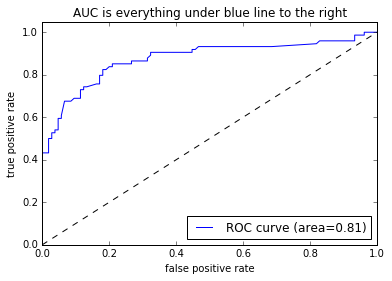

In [26]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC is everything under blue line to the right')
plt.legend(loc='lower right')
plt.show()

The goal of the assignment is to increase the AUC
* AUC started at 0.72 using Sex and Age
* Instead of dropping missing values, I replaced missing age values with the mean and that increased AUC to 0.77
* Then I added pclass variable, and increased AUC to 0.79
* tried using the parents and children variable but that made it worse.
* I tried using the siblings and spouse variable, but also did not see an improvement
* so then I added both parch and sibsp to the model and it now achieves 0.81 AUC.  So separately, parch and sibsp didn't help improve the AUC but together they were able to boost it above 0.80